# 创建散点图，并转换为矩阵格式

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
plt.rcParams['font.family'] = 'SimSun'  # 使用宋体字体作为示例

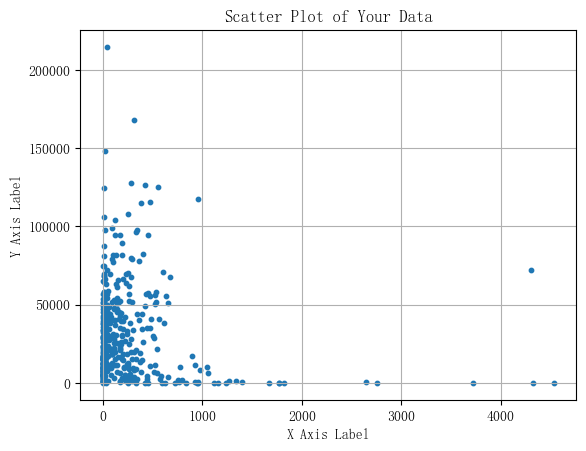

In [2]:
# 读取数据
data = pd.read_excel('散点图.xlsx', engine='openpyxl')

# 获取x和y的数据
x = data.iloc[:, 0]  # 第一列为x
y = data.iloc[:, 1]  # 第二列为y

# 设置点的大小
point_size = 10  # 你可以调整这个值来改变点的大小

# 绘制散点图
plt.scatter(x, y, s=point_size)
plt.xlabel('X Axis Label')
plt.ylabel('Y Axis Label')
plt.title('Scatter Plot of Your Data')
plt.grid(True)
plt.show()

In [3]:
# 获取x和y的数据
x = data.iloc[:, 0].values  # 第一列为x
y = data.iloc[:, 1].values  # 第二列为y

# 重塑x为2维数组
x_matrix = x.reshape(-1, 1)
y_matrix = y.reshape(-1, 1)
combined_matrix = np.hstack((x_matrix, y_matrix))
print(combined_matrix.shape)

(444, 2)


In [4]:
# 生成随机数据
# np.random.seed(0)
# x = np.random.rand(100) * 5000  # 生成100个随机横坐标，范围从0到5000
# y = np.random.rand(100) * 100  # 生成100个随机纵坐标，范围从0到100


#np.random.seed(0)
#x = np.linspace(0, 10, 100)
#y = 2 * x**2 - 3 * x + 1 + np.random.normal(0, 10, len(x))  # 添加噪声

In [5]:
# # 将数据转换为矩阵形式
# x_matrix = x.reshape(-1, 1)

# # 创建散点图
# plt.scatter(x, y)

# # 设置x轴和y轴的范围
# # plt.xlim(0, 5000)
# # plt.ylim(0, 100)

# # 添加标签和标题
# plt.xlabel('X轴')
# plt.ylabel('Y轴')
# plt.title('设置轴范围的散点图示例')

# # 显示图形
# plt.show()

## 对表格进行处理，删除 0  0 点

In [6]:
# 读取.xlsx文件
df = pd.read_excel('患者残差计算图0.xlsx')

# 删除第二列为0的行
df = df[df.iloc[:, 1] != 0]

# 保存修改后的文件
df.to_excel('患者残差计算图1.xlsx', index=False)

# 使用多项式进行拟合

In [9]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from scipy.optimize import curve_fit  # 导入curve_fit函数

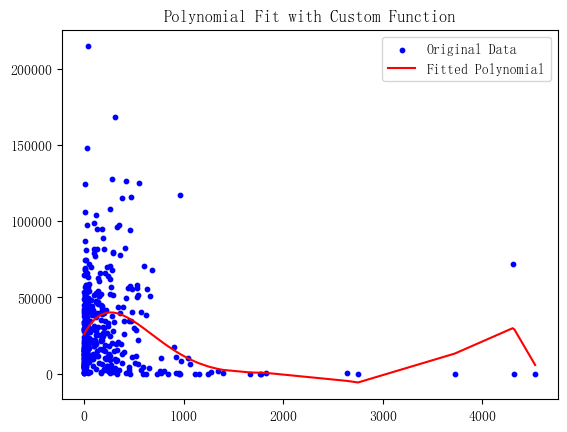

34275.57188664597


In [10]:
x = combined_matrix[:, 0]
y = combined_matrix[:, 1]

sorted_indices = np.argsort(x)
x = x[sorted_indices]
y = y[sorted_indices]

# 定义你想要拟合的多项式函数
def polynomial_function(x, g,a, b, c, d,e,f):
   # return a * x**5 + b * x**4 + c * x**3 + d * x**2 + e * x + f;
    return g * x ** 6 + a * x**5 + b * x**4 + c * x**3 + d * x**2 + e * x + f;

# 使用curve_fit进行拟合
params, covariance = curve_fit(polynomial_function, x, y)

# 打印拟合的参数
#print("Fitted parameters: a =", params[0], ", b =", params[1], ", c =", params[2], ", d =", params[3])

# 使用matplotlib显示原始数据和拟合结果
plt.scatter(x, y, color='blue', label='Original Data',s=point_size)
plt.plot(x, polynomial_function(x, *params), color='red', label='Fitted Polynomial')
plt.legend()
plt.title("Polynomial Fit with Custom Function")
plt.show()


new_x_value = 500
predicted_y_value=polynomial_function(new_x_value,params[0],params[1],params[2],params[3],params[4],params[5],params[6])
print(predicted_y_value)

In [11]:
# 读取.xlsx文件
file_path = '患者残差计算图1.xlsx'  # 替换成你的文件路径
df = pd.read_excel(file_path)

# 遍历第三列的数据，计算预测值并填入第四列
new_x_values = df.iloc[:, 2]  # 假设第三列的数据在DataFrame中是第三列
params = [params[0], params[1], params[2], params[3], params[4], params[5], params[6]]  # 替换成你的参数值
predicted_y_values = [polynomial_function(x, *params) for x in new_x_values]
df['预测值'] = predicted_y_values  # 将预测值添加到第四列

# 保存结果到新的Excel文件
output_file_path = '多项式进行拟合0.xlsx'  # 替换成你想要保存的文件路径
df.to_excel(output_file_path, index=False)

In [12]:
# 读取.xlsx文件
df = pd.read_excel('多项式进行拟合0.xlsx')

# 计算第二列减去第四列的结果，并将结果放入第五列
df['残差值'] = df.iloc[:, 1] - df.iloc[:, 3]

# 保存修改后的文件
df.to_excel('多项式进行拟合1.xlsx', index=False)

In [13]:
# 删除第二列和第三列
df.drop(columns=[df.columns[1], df.columns[2], df.columns[3]], inplace=True)

# 保存修改后的文件
df.to_excel('多项式进行拟合2.xlsx', index=False)

In [14]:
# 读取原始的.xlsx文件
df = pd.read_excel('多项式进行拟合2.xlsx')

# 使用groupby将数据按照患者分组，并对残差值进行求和
grouped = df.groupby('患者')['残差值'].sum().reset_index()

# 保存统计结果到一个新的.xlsx文件
grouped.to_excel('多项式进行拟合3.xlsx', index=False)

# SVR模型回归拟合

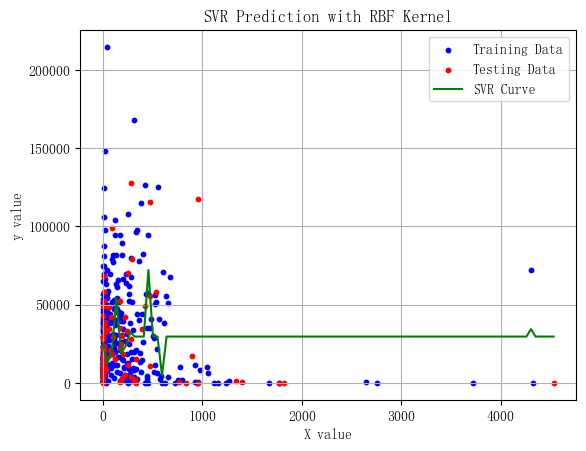

[29610.14087805]


In [17]:
from sklearn.model_selection import train_test_split  # 导入train_test_split函数
from sklearn.svm import SVR  # 导入SVR模型
from scipy.optimize import curve_fit  # 导入curve_fit函数
# 分割特征和目标值
X = combined_matrix[:, 0].reshape(-1, 1)
y = combined_matrix[:, 1]

# 划分训练集和测试集
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 创建SVR模型，使用 'rbf' 核
svr = SVR(kernel='rbf', C=1e5, gamma=0.5)

# 训练模型
svr.fit(X_train, y_train)

# 进行预测
y_pred = svr.predict(X_test)

# 绘制训练数据、测试数据和SVR预测曲线
plt.scatter(X_train, y_train, color='blue', label='Training Data',s=point_size)
plt.scatter(X_test, y_test, color='red', label='Testing Data',s=point_size)

# 使用 SVR 预测整个X范围内的y值以得到完整的曲线
X_range = np.linspace(X.min(), X.max(), 100).reshape(-1, 1)
y_range_pred = svr.predict(X_range)
plt.plot(X_range, y_range_pred, color='green', label='SVR Curve')

plt.xlabel('X value')
plt.ylabel('y value')
plt.title('SVR Prediction with RBF Kernel')
plt.legend()
plt.grid(True)
plt.show()


# 提供一个新的x值
new_x_value = np.array([[500]])  # 假设你想预测x=5时的y值
# 使用模型进行预测
predicted_y_value = svr.predict(new_x_value)
print(predicted_y_value)

In [18]:
# 读取.xlsx文件
df = pd.read_excel('患者残差计算图1.xlsx')

# 将第三列数据作为 x
x = df.iloc[:, 2].values.reshape(-1, 1)

# 遍历表格的每一行，计算预测值并填入第四列
predicted_y_values = []
for index, row in df.iterrows():
    new_x_value = np.array([[row[2]]])  # 使用第三列的值作为新的 x
    predicted_y_value = svr.predict(new_x_value)
    predicted_y_values.append(predicted_y_value[0])

df['预测值'] = predicted_y_values  # 将预测值添加到第四列

# 保存带有预测值的新表格
df.to_excel('SVR模型回归拟合0.xlsx', index=False)

In [19]:
# 读取.xlsx文件
df = pd.read_excel('SVR模型回归拟合0.xlsx')

# 计算第二列减去第四列的结果，并将结果放入第五列
df['残差值'] = df.iloc[:, 1] - df.iloc[:, 3]

# 保存修改后的文件
df.to_excel('SVR模型回归拟合1.xlsx', index=False)

In [20]:
# 删除第二列和第三列
df.drop(columns=[df.columns[1], df.columns[2], df.columns[3]], inplace=True)

# 保存修改后的文件
df.to_excel('SVR模型回归拟合2.xlsx', index=False)

In [25]:
# 读取原始的.xlsx文件
df = pd.read_excel('SVR模型回归拟合2.xlsx')

# 使用groupby将数据按照患者分组，并对残差值进行求和
grouped = df.groupby('患者')['残差值'].sum().reset_index()

# 保存统计结果到一个新的.xlsx文件
grouped.to_excel('SVR模型回归拟合3.xlsx', index=False)

# 随机森林回归拟合

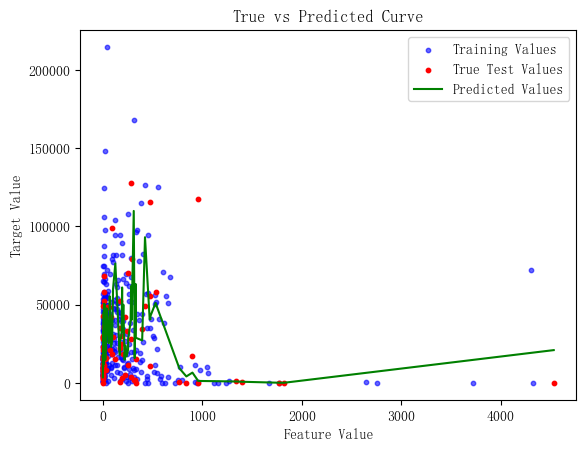

Predicted value for new_x: [25093.89]


In [28]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error

# ... [Your previous code up to the mse calculation]

# Sort X_train and its corresponding y_train
sorted_idx_train = np.argsort(X_train[:, 0])  # Assuming X has only one feature
X_train_sorted = X_train[sorted_idx_train]
y_train_sorted = y_train[sorted_idx_train]

# Plotting
# Plot training data points
plt.scatter(X_train_sorted, y_train_sorted, color="blue", label="Training Values", s=10, alpha=0.6)
# Plot test data points
plt.scatter(X_test_sorted, y_test_sorted, color="red", label="True Test Values", s=10)
plt.plot(X_test_sorted, y_pred_sorted, color="green", label="Predicted Values")
plt.xlabel("Feature Value")
plt.ylabel("Target Value")
plt.title("True vs Predicted Curve")
plt.legend()
plt.show()



# 假设 new_x 是你想要预测的数据点, 它应该是一个二维数组，即使只有一个数据点
new_x = np.array([[500]])  # 替换...为你的数据

# 使用模型进行预测
predicted_y = regr.predict(new_x)

print("Predicted value for new_x:", predicted_y)

In [29]:
# 读取.xlsx文件
df = pd.read_excel('患者残差计算图1.xlsx')

# 将第三列数据作为 x
x = df.iloc[:, 2].values.reshape(-1, 1)

# 遍历表格的每一行，计算预测值并填入第四列
predicted_y_values = []
for index, row in df.iterrows():
    new_x_value = np.array([[row[2]]])  # 使用第三列的值作为新的 x
    predicted_y_value = regr.predict(new_x_value)
    predicted_y_values.append(predicted_y_value[0])

df['预测值'] = predicted_y_values  # 将预测值添加到第四列

# 保存带有预测值的新表格
df.to_excel('随机森林回归拟合0.xlsx', index=False)

In [30]:
# 读取.xlsx文件
df = pd.read_excel('随机森林回归拟合0.xlsx')

# 计算第二列减去第四列的结果，并将结果放入第五列
df['残差值'] = df.iloc[:, 1] - df.iloc[:, 3]

# 保存修改后的文件
df.to_excel('随机森林回归拟合1.xlsx', index=False)

In [31]:
# 删除第二列和第三列
df.drop(columns=[df.columns[1], df.columns[2], df.columns[3]], inplace=True)

# 保存修改后的文件
df.to_excel('随机森林回归拟合2.xlsx', index=False)

In [32]:
# 读取原始的.xlsx文件
df = pd.read_excel('随机森林回归拟合2.xlsx')

# 使用groupby将数据按照患者分组，并对残差值进行求和
grouped = df.groupby('患者')['残差值'].sum().reset_index()

# 保存统计结果到一个新的.xlsx文件
grouped.to_excel('随机森林回归拟合3.xlsx', index=False)

# 三者对比分析

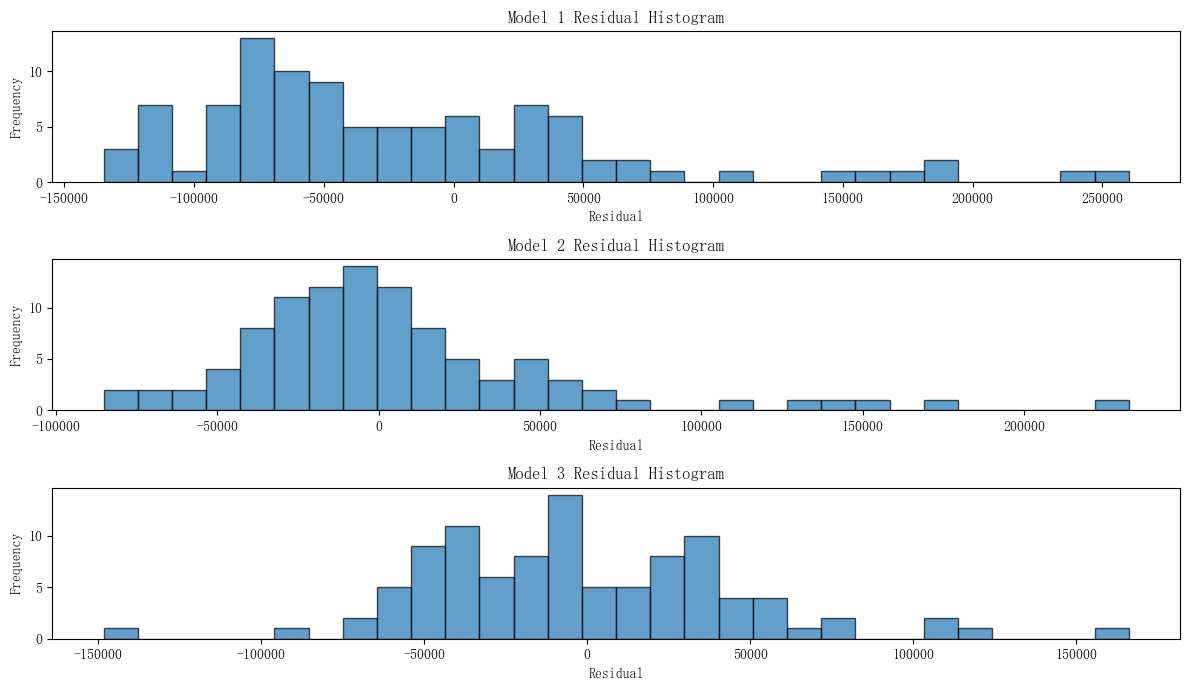

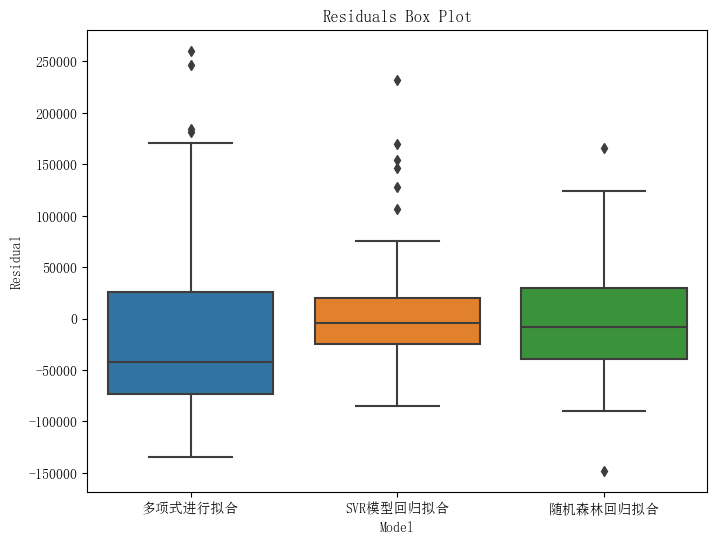

In [34]:
import seaborn as sns
# 添加此行来修复问题
plt.rcParams['axes.unicode_minus'] = False

# 读取数据
df1 = pd.read_excel('多项式进行拟合3.xlsx')
df2 = pd.read_excel('SVR模型回归拟合3.xlsx')
df3 = pd.read_excel('随机森林回归拟合3.xlsx')

# 假设残差列名为"residual"
residuals = [df1['残差值'], df2['残差值'], df3['残差值']]

# 绘制直方图
plt.figure(figsize=(12, 7))
for index, residual in enumerate(residuals, 1):
    plt.subplot(3, 1, index)
    plt.hist(residual, bins=30, edgecolor='k', alpha=0.7)
    plt.title(f'Model {index} Residual Histogram')
    plt.xlabel('Residual')
    plt.ylabel('Frequency')
plt.tight_layout()
plt.show()

# 绘制Box Plot
plt.figure(figsize=(8, 6))
sns.boxplot(data=residuals)
plt.title('Residuals Box Plot')
plt.xlabel('Model')
plt.ylabel('Residual')
plt.xticks([0, 1, 2], ['多项式进行拟合', 'SVR模型回归拟合', '随机森林回归拟合'])
plt.show()
